# t-SNE vs PCA vs LDA
I recently got to know about t-SNE and was very suprised to see the difference in the results among t-SNE and PCA, So I wanted to share what I found in the implementation
of this amazing algorithm.

## Stage-1 Loading the dataset
we will use the "digit recognizer" dataset to see the visual differences of the outcomes after dimansanality reduction from PCA and t-SNE.

1) Import the normal Libraries

2) Load the dataset

3) Split the dataset in dependent and independent variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.shape

In [ ]:
data.head()

In [ ]:
label = data['label']
label.shape

In [ ]:
dependent = data.drop('label',axis=1)
dependent.shape

### Visualising a row of the data and cross-checking the loaded data

In [ ]:
plt.figure(figsize=(7,7))
row_index = 100

grid_data = np.array(dependent.iloc[row_index]).reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap= "gray")
plt.show()
print(label.iloc[row_index])

## Stage-2 Standardization of Data

Well PCA tries to preserve the maximum variance along a dimension by projecting the features on that dimension so it becomes necessary to scale the features to not give a particular feature advantage.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dependent_scaled = StandardScaler().fit_transform(dependent)
dependent_scaled.shape

## Stage-3 Understanding and Applying PCA

Keeping it brief PCA tries to maximize the varience (range of feature) so as to keep the most important features of datasets preserved, but it has some flaws in it and that is it can't preserve the structure of the dataset which is solved by t-SNE.

example :- For simplisity let us take a 2-dim dataset and reduce it to a 1-dim dataset.


In the left image we could see some 2-dim. dataset without standardisation.

In the right side image after standardisation the PCA looks for such a dimension/vector that the variance after the projection on the new_plane is maximum. In this case that new_plane is f' and this new_plane will become our new 1-Dim/featured dataset

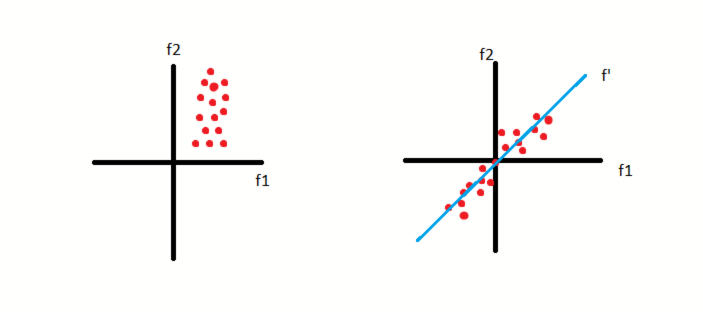

In [ ]:
from sklearn.decomposition import PCA

PCA class has a parameter "n_components" which decides the number of dimensions we want after reduction.

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
pca_data = pca.fit_transform(dependent_scaled)

Now we have to add our "pca_data" and "label" to plot them over labels.

To do so we will use numpy function of vertical stack and then convert them into a dataframe.

In [ ]:
new_pca_data = np.vstack((pca_data.T,label)).T

In [ ]:
new_pca_data.shape

In [ ]:
new_pca_df = pd.DataFrame(data = new_pca_data, columns = ('1st','2nd','label'))
new_pca_df.head()

## Stage-4 Plotting PCA results 

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style(style='dark')

In [ ]:

sns.FacetGrid(new_pca_df, hue='label', height=8 ) \
    .map(plt.scatter, '1st', '2nd') \
    .add_legend()
plt.show()

well as you can see that the results are not that great. Majority of the points are colliding in a cluster or so and that happens because in the higher dimension they have a proper structure which is completey lost when trying to apply PCA. Well don't get disappointed the next thing up (t-SNE) does a amazing job.

## PCA in 3-D 

In [ ]:
pca_3d = PCA(n_components=3)

In [ ]:
pca_3d_data = pca_3d.fit_transform(dependent_scaled)

In [ ]:
new_pca_3d_data = np.vstack((pca_3d_data.T,label)).T

In [ ]:
new_pca_3d_data.shape

In [ ]:
new_pca_3d_df = pd.DataFrame(data = new_pca_3d_data, columns = ('1st','2nd','3rd','label'))
new_pca_3d_df.head()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(new_pca_3d_df,
    x='1st',
    y='2nd',
    z='3rd',
    color='label', title='PCA')

fig.show()

We could see that even the 3-D don't provide much of a seperation. It is really messy.

### Let's See how does  kernel PCA fare (to reduce complexity we will use only 10k rows)

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kernel_pca_3d_linear = KernelPCA(n_components=3, kernel='linear', n_jobs=-1)
kernel_pca_3d_rbf = KernelPCA(n_components=3, kernel='rbf', n_jobs=-1)
kernel_pca_3d_poly = KernelPCA(n_components=3, kernel='poly', n_jobs=-1)
kernel_pca_3d_cosine = KernelPCA(n_components=3, kernel='cosine', n_jobs=-1)

In [ ]:
kernel_pca_3d_linear_df = kernel_pca_3d_linear.fit_transform(dependent_scaled[:10000])
kernel_pca_3d_rbf_df = kernel_pca_3d_rbf.fit_transform(dependent_scaled[:10000])
kernel_pca_3d_poly_df = kernel_pca_3d_poly.fit_transform(dependent_scaled[:10000])
kernel_pca_3d_cosine_df = kernel_pca_3d_cosine.fit_transform(dependent_scaled[:10000])

In [ ]:
kernel_pca_3d_linear_df = pd.DataFrame(data = kernel_pca_3d_linear_df, columns = ('1st','2nd','3rd'))
kernel_pca_3d_rbf_df = pd.DataFrame(data = kernel_pca_3d_rbf_df, columns = ('1st','2nd','3rd'))
kernel_pca_3d_poly_df = pd.DataFrame(data = kernel_pca_3d_poly_df, columns = ('1st','2nd','3rd'))
kernel_pca_3d_cosine_df = pd.DataFrame(data = kernel_pca_3d_cosine_df, columns = ('1st','2nd','3rd'))

In [ ]:
kernel_pca_3d_linear_df['label'] = label[:10000]
kernel_pca_3d_rbf_df['label'] = label[:10000]
kernel_pca_3d_poly_df['label'] = label[:10000]
kernel_pca_3d_cosine_df['label'] = label[:10000]

In [ ]:
plot1 = px.scatter_3d(kernel_pca_3d_linear_df,
    x='1st',
    y='2nd',
    z='3rd',
    color='label', title='linear')

plot2 = px.scatter_3d(kernel_pca_3d_rbf_df,
    x='1st',
    y='2nd',
    z='3rd',
    color='label', title='rbf')

plot3 = px.scatter_3d(kernel_pca_3d_poly_df,
    x='1st',
    y='2nd',
    z='3rd',
    color='label', title='poly')

plot4 = px.scatter_3d(kernel_pca_3d_cosine_df,
    x='1st',
    y='2nd',
    z='3rd',
    color='label',title='cosine')

In [ ]:
plot1.show()

In [ ]:
plot2.show()

In [ ]:
plot3.show()

In [ ]:
plot4.show()

#### None of the kernel PCA give satisfactory seperation, now let's try LDA 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
lda_data = lda.fit_transform(dependent_scaled, label)

In [ ]:
lda_df = pd.DataFrame(lda_data)

In [ ]:
lda_df['label'] = label

In [ ]:
lda_df.columns = ['1st', '2nd', 'label']

In [ ]:
lda_df.head()

In [ ]:
sns.FacetGrid(lda_df, hue='label', height=8) \
    .map(plt.scatter, '1st', '2nd') \
    .add_legend()
plt.show()

In [ ]:
lda_3d = LinearDiscriminantAnalysis(n_components=3)

In [ ]:
lda_3d_df = lda_3d.fit_transform(dependent_scaled[:10000],label[:10000])
lda_3d_df = pd.DataFrame(lda_3d_df, columns=['1st','2nd','3rd'])
lda_3d_df['label'] = label[:10000]

In [ ]:
plot = px.scatter_3d(lda_3d_df, x='1st', y='2nd', z='3rd', color='label', title='LDA-3D')
plot.show()

### LDA gave much better results than PCA and kernel_pca, but can we get something even better, let's try TSNE.

## Stage-5 Understanding and Applying t-SNE

t-SNE = Student's t distributed Stoschastic Neighbourhood Embedding

In brief t-SNE assigns high probabilty over a pair to the points which are closer to each other in high dimension and low probabilty to those which are far apart. Now it tries to replicate that probabilty distribution in the low dimension and that helps it in preserving the structure.

In t-SNE centering shouldn't matter since the algorithm only operates on distances between points, however rescaling is necessary if you want the different dimensions to be treated with equal importance, since the 2-norm will be more heavily influenced by dimensions with large variance so we will still use standardised data.

Well TSNE is and iterative algorithm.

In [ ]:
from sklearn.manifold import TSNE

TSNE has 2 very important hyperparameters.

1) Perplexity => this refers to how many points does u want to consider for finding the probabilty of them being close by.

2) n_iter => number of iterations u want to perform before aborting.

You should generally take high value for n_iter (say 2000 to 5000), and  observe the t-SNE plot wheather it is reaching to some stable form after n_iter number of iterations.
In short try different perplexity with constant high iterations.

After trying different values I am going for the default values of "perplexity" and "n_iter" in this case.

n_components means to what dimensions you want to reduce the dataset to.
TSNE support only 2 and 3 dimensions

In [ ]:
tsne= TSNE(n_components = 2, n_jobs=-1)

In [ ]:
dependent_scaled.head()

In [ ]:
tsne_data = tsne.fit_transform(dependent_scaled[:10000])

Again to plot the results we will have to make a new dataset with labels and tsne_data and the make a dataframe.

In [ ]:
new_tsne_df = pd.DataFrame(data = tsne_data, columns = ('1st','2nd'))

In [ ]:
new_tsne_df['label'] = label[:10000]

## Stage-6 Plotting the t-SNE 

finally we will see how good does t-SNE work.

In [ ]:
sns.FacetGrid(new_tsne_df, hue='label', height=8) \
    .map(plt.scatter, '1st', '2nd') \
    .add_legend()
plt.show()
# and BINGO!!

As you can see in compare to PCA t-SNE has done tarrific work in dimensanality reduncation.

In [ ]:
tsne3d = TSNE(n_components = 3, n_jobs = -1).fit_transform(dependent_scaled[:10000])

In [ ]:
tsne_df = pd.DataFrame(tsne3d, columns=['1st', '2nd', '3rd'])
tsne_df['label'] = label[:10000]

In [ ]:
fig = px.scatter_3d(tsne_df, x='1st', y='2nd', z='3rd', color='label', title='TSNE 3-D')
fig.show()

Amazing results. We could easily see the different layers of clysters.

Hope you liked it.
If found useful please upvote 👍👍

Here is a link for deeper visualisation for t-SNE, I recommend you visit : https://distill.pub/2016/misread-tsne/ with this you will be able to tune TSNE for better results.